In [1]:
import numpy as np

In [36]:
class MetropolisHastingsNormal:
    def __init__(self, delta, starting_point=0.0):
        self.delta = delta
        self.current = starting_point
        self.trajectory = [self.current]

    def proposal(self, x):
        # return 1/(2 * self.delta)  if abs(x) <= self.delta else 0
        u = np.random.uniform(-self.delta, self.delta)
        return x + u

    def acceptance_probability(self, x, y):
        return min(np.exp(-y**2/2)/np.exp(-x**2/2), 1)
    
    def step(self):
        u = np.random.uniform()
        x = self.current
        y = self.proposal(x)
        alpha = self.acceptance_probability(x, y)
        next_state = y if u <= alpha else x
        self.current = next_state 
        self.trajectory.append(self.current)
        return self.current
    
    def sample(self, n):
        sample = np.zeros(n)
        for i in range(n):
            sample[i] = self.step()
        
        return sample



In [37]:
mh = MetropolisHastingsNormal(0.5)

In [38]:
sample = mh.sample(100000)

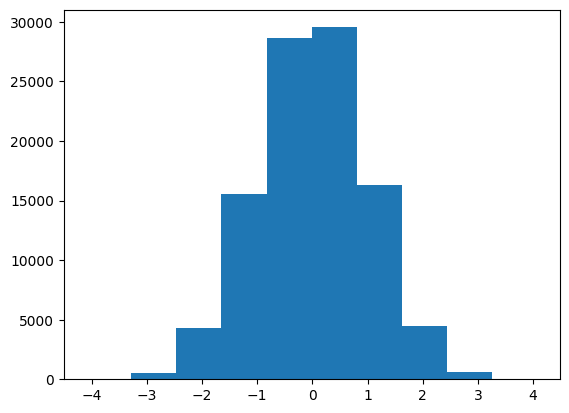

In [39]:
import matplotlib.pyplot as plt


plt.hist(sample)
plt.show()

## badamy parametr delta

In [77]:
# deltas = np.arange(0, 10, 1)
N = 400
deltas = np.linspace(0, 100, N)
# deltas

In [78]:
n = 100_000
samples = []
for i in range(N):
    print(f"Compleation status: {i/N}")
    mh = MetropolisHastingsNormal(delta=deltas[i])
    sample = mh.sample(n)
    samples.append(sample)

Compleation status: 0.0
Compleation status: 0.0025
Compleation status: 0.005
Compleation status: 0.0075
Compleation status: 0.01
Compleation status: 0.0125
Compleation status: 0.015
Compleation status: 0.0175
Compleation status: 0.02
Compleation status: 0.0225
Compleation status: 0.025
Compleation status: 0.0275
Compleation status: 0.03
Compleation status: 0.0325
Compleation status: 0.035
Compleation status: 0.0375
Compleation status: 0.04
Compleation status: 0.0425
Compleation status: 0.045
Compleation status: 0.0475
Compleation status: 0.05
Compleation status: 0.0525
Compleation status: 0.055
Compleation status: 0.0575
Compleation status: 0.06
Compleation status: 0.0625
Compleation status: 0.065
Compleation status: 0.0675
Compleation status: 0.07
Compleation status: 0.0725
Compleation status: 0.075
Compleation status: 0.0775
Compleation status: 0.08
Compleation status: 0.0825
Compleation status: 0.085
Compleation status: 0.0875
Compleation status: 0.09
Compleation status: 0.0925
Comp

In [58]:
len(samples), len(samples[0])

(100, 10000)

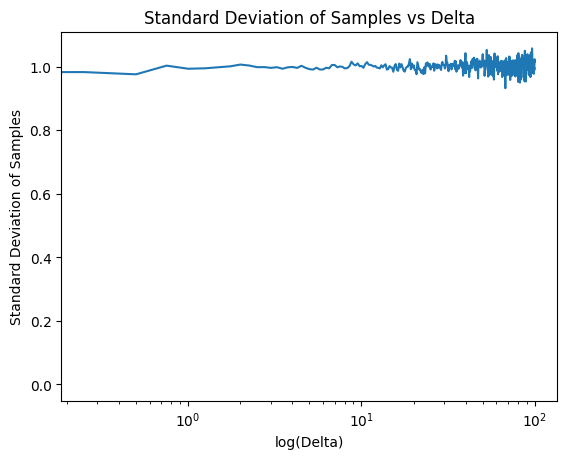

In [83]:
plt.plot(deltas, [np.std(sample) for sample in samples])
plt.xlabel("log(Delta)")
plt.ylabel("Standard Deviation of Samples")
plt.title("Standard Deviation of Samples vs Delta")
plt.xscale("log")
plt.show()

zwiększając delta coraz mniej kroków akceptujemy i przez to mamy większą wariancję